<a href="https://colab.research.google.com/github/mohamedxxhechxxbenxxhadid/tactic_sense/blob/ahmed/modeling_part_bo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
import pandas as pd

# Télécharger le fichier
uploaded = files.upload()

# Charger le fichier dans un DataFrame Pandas
df = pd.read_csv("stretch_exercise_dataset new.csv")

# Afficher les premières lignes du dataset
df.head(10)


Saving stretch_exercise_dataset new.csv to stretch_exercise_dataset new.csv


,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle
0,Retraction​​​​​​​,Stretch,Stand or sit.,Pull head back as far possible while looking s...,"Longus colli,","Splenius, Trapezius, Upper, Erector Spinae, Ce...",Neck
1,Neck Extensor,Stretch,Bow head forward with jaw shut. Depress chin i...,Slightly turn head to one side. Hold stretch. ...,"Splenius,","Trapezius, Upper (Part 1), Erector Spinae, Cer...",Neck
2,Doorway,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
3,Wall,Stretch,0,0,"Deltoid, Anterior,","Pectoralis Major, Sternal, Pectoralis Major, C...",Shoulder
4,Side Deltoid,Stretch,0,0,"Deltoid, Lateral,","Infraspinatus, Teres Minor, Trapezius, Middle,...",Shoulder
5,Rear Deltoid,Stretch,0,0,"Deltoid, Posterior,","Infraspinatus, Teres Minor, Trapezius, Middle,...",Shoulder
6,Overhead​​​​​​​,Stretch,Put one arm overhead. Position forearm as clos...,Pull elbow back and toward head. Hold stretch....,"Triceps, Long Head,","Latissimus Dorsi, Teres Major,",Upper Arms
7,Towel,Stretch,Grasp near end of towel or rope. Position towe...,Pull towel downward with lower arm. Hold stret...,"Triceps, Long Head,","Latissimus Dorsi, Teres Major,",Upper Arms
8,Doorway,Stretch,Stand at end of wall or in doorway facing perp...,Turn body away from positioned arm. Hold stret...,"Biceps Brachii,","Deltoid, Anterior, Pectoralis Major, Sternal, ...",Upper Arms
9,Seated,Stretch,Sit on floor or mat. Lean back and place hands...,Scoot hips forward away from hands. Hold stretch.,"Biceps Brachii,","Deltoid, Anterior, Pectoralis Major, Sternal, ...",Upper Arms


In [4]:
df.columns


Index(['Exercise Name', 'Equipment', 'Preparation', 'Execution',
       'Target_Muscles', 'Synergist_Muscles', 'Main_muscle'],
      dtype='object')

In [5]:
# 1. Importer les librairies
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords une seule fois si nécessaire
nltk.download('stopwords')

# 2. Charger le fichier
df = pd.read_csv("stretch_exercise_dataset new.csv")

# 3. Nettoyer les colonnes importantes
# Remplacer les NaN par des chaînes vides
df.fillna('', inplace=True)

# Supprimer les espaces en trop + mettre tout en minuscule pour l'uniformité
def clean_text(text):
    text = str(text).lower()                          # minuscule
    text = re.sub(r'\s+', ' ', text)                   # supprimer les espaces multiples
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)         # enlever caractères spéciaux
    text = text.strip()                                # enlever espaces au début/fin
    return text

columns_to_clean = ['Equipment', 'Preparation', 'Execution',
                    'Target_Muscles', 'Synergist_Muscles', 'Main_muscle']

for col in columns_to_clean:
    df[col] = df[col].apply(clean_text)

# 4. Créer une nouvelle colonne qui concatène tout le texte utile
df["texte_concatené"] = (
    df["Equipment"] + " " +
    df["Preparation"] + " " +
    df["Execution"] + " " +
    df["Target_Muscles"] + " " +
    df["Synergist_Muscles"] + " " +
    df["Main_muscle"]
)

# 5. Nettoyage final du texte concaténé (enlever les stopwords)
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    tokens_filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens_filtered)

df["texte_concatené"] = df["texte_concatené"].apply(remove_stopwords)

# 6. Vérification rapide
print(df[["Exercise Name", "texte_concatené"]].head())
df.head(20)

       Exercise Name                                    texte_concatené
0  Retraction​​​​​​​  stretch stand sit pull head back far possible ...
1      Neck Extensor  stretch bow head forward jaw shut depress chin...
2            Doorway  stretch 0 0 deltoid anterior pectoralis major ...
3               Wall  stretch 0 0 deltoid anterior pectoralis major ...
4       Side Deltoid  stretch 0 0 deltoid lateral infraspinatus tere...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Exercise Name,Equipment,Preparation,Execution,Target_Muscles,Synergist_Muscles,Main_muscle,texte_concatené
0,Retraction​​​​​​​,stretch,stand or sit,pull head back as far possible while looking s...,longus colli,splenius trapezius upper erector spinae cervic...,neck,stretch stand sit pull head back far possible ...
1,Neck Extensor,stretch,bow head forward with jaw shut depress chin in...,slightly turn head to one side hold stretch re...,splenius,trapezius upper part 1 erector spinae cervicis...,neck,stretch bow head forward jaw shut depress chin...
2,Doorway,stretch,0,0,deltoid anterior,pectoralis major sternal pectoralis major clav...,shoulder,stretch 0 0 deltoid anterior pectoralis major ...
3,Wall,stretch,0,0,deltoid anterior,pectoralis major sternal pectoralis major clav...,shoulder,stretch 0 0 deltoid anterior pectoralis major ...
4,Side Deltoid,stretch,0,0,deltoid lateral,infraspinatus teres minor trapezius middle tra...,shoulder,stretch 0 0 deltoid lateral infraspinatus tere...
5,Rear Deltoid,stretch,0,0,deltoid posterior,infraspinatus teres minor trapezius middle tra...,shoulder,stretch 0 0 deltoid posterior infraspinatus te...
6,Overhead​​​​​​​,stretch,put one arm overhead position forearm as close...,pull elbow back and toward head hold stretch r...,triceps long head,latissimus dorsi teres major,upper arms,stretch put one arm overhead position forearm ...
7,Towel,stretch,grasp near end of towel or rope position towel...,pull towel downward with lower arm hold stretc...,triceps long head,latissimus dorsi teres major,upper arms,stretch grasp near end towel rope position tow...
8,Doorway,stretch,stand at end of wall or in doorway facing perp...,turn body away from positioned arm hold stretc...,biceps brachii,deltoid anterior pectoralis major sternal pect...,upper arms,stretch stand end wall doorway facing perpendi...
9,Seated,stretch,sit on floor or mat lean back and place hands ...,scoot hips forward away from hands hold stretch,biceps brachii,deltoid anterior pectoralis major sternal pect...,upper arms,stretch sit floor mat lean back place hands fl...


In [6]:
# 1. Importer les librairies
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords une seule fois si nécessaire
nltk.download('stopwords')

# 2. Charger le fichier
df = pd.read_csv("stretch_exercise_dataset new.csv")

# 3. Nettoyer les colonnes importantes
# Remplacer les NaN par des chaînes vides
df.fillna('', inplace=True)

# 3bis. Remplacer aussi les 0 (isolés) par vide
columns_to_clean = ['Equipment', 'Preparation', 'Execution',
                    'Target_Muscles', 'Synergist_Muscles', 'Main_muscle']

for col in columns_to_clean:
    df[col] = df[col].replace('0', '')  # 0 → ''
    df[col] = df[col].apply(lambda x: str(x))  # forcer en string

# 4. Fonction de nettoyage
def clean_text(text):
    text = str(text).lower()                           # mettre en minuscules
    text = re.sub(r'\s+', ' ', text)                    # supprimer les espaces multiples
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)          # enlever caractères spéciaux
    text = text.strip()                                 # enlever espaces début/fin
    return text

# Appliquer le nettoyage sur les colonnes
for col in columns_to_clean:
    df[col] = df[col].apply(clean_text)

# 5. Créer la colonne texte_concatené
df["texte_concatené"] = (
    df["Equipment"] + " " +
    df["Preparation"] + " " +
    df["Execution"] + " " +
    df["Target_Muscles"] + " " +
    df["Synergist_Muscles"] + " " +
    df["Main_muscle"]
)

# Nettoyer espaces en trop après concaténation
df["texte_concatené"] = df["texte_concatené"].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# 6. Retirer les stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    tokens_filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens_filtered)

df["texte_concatené"] = df["texte_concatené"].apply(remove_stopwords)

# 7. Vérification finale
print(df[["Exercise Name", "texte_concatené"]].head(20))


        Exercise Name                                    texte_concatené
0   Retraction​​​​​​​  stretch stand sit pull head back far possible ...
1       Neck Extensor  stretch bow head forward jaw shut depress chin...
2             Doorway  stretch deltoid anterior pectoralis major ster...
3                Wall  stretch deltoid anterior pectoralis major ster...
4        Side Deltoid  stretch deltoid lateral infraspinatus teres mi...
5        Rear Deltoid  stretch deltoid posterior infraspinatus teres ...
6     Overhead​​​​​​​  stretch put one arm overhead position forearm ...
7               Towel  stretch grasp near end towel rope position tow...
8             Doorway  stretch stand end wall doorway facing perpendi...
9              Seated  stretch sit floor mat lean back place hands fl...
10           Standing  stretch cross wrists point thumbs downward cla...
11      Seated​​​​​​​  stretch sit floor place palms floor sides behi...
12           Kneeling  stretch kneel floor mat plac

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# --- Après tout le nettoyage précédent ---

# Nouveau DataFrame propre
df_cleaned = df[["Exercise Name", "texte_concatené"]].copy()

# Vérification rapide
print(df_cleaned.head(10))
df_cleaned.size

       Exercise Name                                    texte_concatené
0  Retraction​​​​​​​  stretch stand sit pull head back far possible ...
1      Neck Extensor  stretch bow head forward jaw shut depress chin...
2            Doorway  stretch deltoid anterior pectoralis major ster...
3               Wall  stretch deltoid anterior pectoralis major ster...
4       Side Deltoid  stretch deltoid lateral infraspinatus teres mi...
5       Rear Deltoid  stretch deltoid posterior infraspinatus teres ...
6    Overhead​​​​​​​  stretch put one arm overhead position forearm ...
7              Towel  stretch grasp near end towel rope position tow...
8            Doorway  stretch stand end wall doorway facing perpendi...
9             Seated  stretch sit floor mat lean back place hands fl...


188

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Instancier le vectorizer
vectorizer = TfidfVectorizer()

# 2. Appliquer sur la colonne texte_concatené
tfidf_matrix = vectorizer.fit_transform(df_cleaned["texte_concatené"])

# 3. Vérification
print("Shape de la matrice TF-IDF:", tfidf_matrix.shape)


Shape de la matrice TF-IDF: (94, 360)


In [9]:
# Convertir la matrice sparse en array dense (attention à la RAM si énorme dataset, mais ici ça va)
dense_tfidf = tfidf_matrix.toarray()

# Créer un DataFrame pour visualiser proprement
df_vectors = pd.DataFrame(dense_tfidf, index=df_cleaned["Exercise Name"], columns=vectorizer.get_feature_names_out())

# Afficher les premiers vecteurs
print(df_vectors.head(10))


                    20   45   90  addition  adductor  adductors  adjacent  \
Exercise Name                                                               
Retraction​​​​​​​  0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Neck Extensor      0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Doorway            0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Wall               0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Side Deltoid       0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Rear Deltoid       0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Overhead​​​​​​​    0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Towel              0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Doorway            0.0  0.0  0.0       0.0       0.0        0.0       0.0   
Seated             0.0  0.0  0.0       0.0       0.0        0.0       0.0   

                   adjustable  allow  allowing  ...  use     waist  walk  \

In [10]:
# 1. Convertir la matrice sparse en dense
dense_tfidf = tfidf_matrix.toarray()

# 2. Créer un DataFrame propre pour visualiser
df_vectors = pd.DataFrame(
    dense_tfidf,
    index=df_cleaned["Exercise Name"],                  # Noms des exercices comme index
    columns=vectorizer.get_feature_names_out()           # Mots comme colonnes
)

# 3. Afficher proprement les premiers exercices avec leur vecteur
pd.set_option('display.max_columns', 10)  # Limite l'affichage à 10 colonnes pour ne pas saturer l'écran
print("\n--- Vecteurs TF-IDF associés aux exercices (extrait) ---")
print(df_vectors.head(10))



--- Vecteurs TF-IDF associés aux exercices (extrait) ---
                    20   45   90  addition  adductor  ...  way  weight  wise  \
Exercise Name                                         ...                      
Retraction​​​​​​​  0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Neck Extensor      0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Doorway            0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Wall               0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Side Deltoid       0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Rear Deltoid       0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Overhead​​​​​​​    0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Towel              0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Doorway            0.0  0.0  0.0       0.0       0.0  ...  0.0     0.0   0.0   
Seated             0.0  0.0  0.0       0.0       0.0  ...  0.0

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def get_relevant_context(user_query, tfidf_matrix, df_cleaned, vectorizer, top_n=3):
    # Vectoriser la requête utilisateur
    query_vec = vectorizer.transform([user_query])

    # Calculer la similarité cosinus
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

    # Trouver les indices des meilleurs résultats
    top_indices = similarities.argsort()[::-1][:top_n]

    # Créer un DataFrame propre pour afficher les résultats
    results = pd.DataFrame({
        "Exercise Name": df_cleaned.iloc[top_indices]["Exercise Name"].values,
        "Similarity Score": similarities[top_indices]
    })

    # Trier par score décroissant pour la présentation
    results = results.sort_values(by="Similarity Score", ascending=False)

    return results

# Exemple d'utilisation
user_query = "I have pain in my back, I need stretching exercises"
results = get_relevant_context(user_query, tfidf_matrix, df_cleaned, vectorizer, top_n=3)

# Affichage beau
print("\n--- Meilleurs exercices trouvés pour ta requête ---")
print(results.to_string(index=False))



--- Meilleurs exercices trouvés pour ta requête ---
   Exercise Name  Similarity Score
           Lever          0.316323
Lying Wall Groin          0.307850
   Seated​​​​​​​          0.271996


In [12]:
import http.client
import json

def ask_llm_via_rapidapi(user_query, context):
    conn = http.client.HTTPSConnection("open-ai21.p.rapidapi.com")

    # Construire le prompt en liant question + contexte
    prompt = f"""
    User Question: {user_query}
    Context: {context}

    Based on the context, provide a helpful, complete and clear answer.
    """

    payload = json.dumps({
        "messages": [{"role": "user", "content": prompt}],
        "web_access": False
    })

    headers = {
        'x-rapidapi-key': "5d8b0df6f9msh1b26960426695d9p1794e3jsna0baee12b554",
        'x-rapidapi-host': "open-ai21.p.rapidapi.com",
        'Content-Type': "application/json"
    }

    conn.request("POST", "/conversationllama", payload, headers)
    res = conn.getresponse()
    data = res.read()

    try:
        response_json = json.loads(data.decode("utf-8"))
        return response_json['result']
    except Exception as e:
        print("Erreur :", e)
        print("Données reçues :", data.decode("utf-8"))
        return "Erreur lors de l'appel LLM."


In [13]:
# Extraire le contexte brut sous forme de texte
context_text = results.to_string(index=False)


# Envoyer au LLM
response = ask_llm_via_rapidapi(user_query, context_text)

print("\n--- Réponse générée par le LLM ---")
print(response)



--- Réponse générée par le LLM ---
I'm happy to help you with some stretching exercises to alleviate your back pain! Based on the context, I'll provide you with a few options that might be relevant.

It seems like you're looking for exercises that can help with back pain, and I've identified a few exercises from the context that might be helpful. However, I want to emphasize that it's essential to consult with a healthcare professional or a doctor before starting any new exercise routine, especially if you're experiencing back pain.

That being said, here are a few stretching exercises that might help:

1. **Lying Wall Groin Stretch**: This exercise can help stretch your groin and hip flexor muscles, which can sometimes contribute to back pain. To do this stretch, lie on your back with your feet flat against a wall. Slowly bring one knee towards your chest, keeping your foot flexed, and hold for 30 seconds. Repeat on the other side.
2. **Seated Stretch**: This exercise can help stretc

In [14]:
print(context_text)

   Exercise Name  Similarity Score
           Lever          0.316323
Lying Wall Groin          0.307850
   Seated​​​​​​​          0.271996


In [15]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_relevant_context(user_query, tfidf_matrix, df_cleaned, vectorizer, top_n=1):
    # Transformer la requête utilisateur en vecteur
    query_vec = vectorizer.transform([user_query])

    # Calculer la similarité cosinus
    similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()

    # Récupérer les indices des top_n plus proches
    top_indices = similarities.argsort()[::-1][:top_n]

    # Retourner les exercices correspondants
    return df_cleaned.iloc[top_indices]


In [16]:
# Exemple d'utilisation
user_query = "im so tired from the previous match i have pain in my back  propse me some exercices to go better "

relevant_exercises = get_relevant_context(user_query, tfidf_matrix, df_cleaned, vectorizer, top_n=1)

print("--- Exercices recommandés ---")
print(relevant_exercises)


--- Exercices recommandés ---
   Exercise Name                                    texte_concatené
59         Lever  stretch flip seat way back stand facing bar su...


In [21]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import pickle
import os
MODEL_PATH = 'sentence_transformer_model.pkl'
def load_model():
    """Charge le modèle SentenceTransformer depuis un fichier pickle ou le télécharge si le fichier n'existe pas."""
    if os.path.exists(MODEL_PATH):
        print(f"Chargement du modèle depuis {MODEL_PATH}...")
        with open(MODEL_PATH, 'rb') as f:
            model = pickle.load(f)
        print("Modèle chargé.")
        return model
    else:
        print("Téléchargement du modèle SentenceTransformer...")
        model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
        print("Modèle téléchargé. Sauvegarde en fichier...")
        with open(MODEL_PATH, 'wb') as f:
            pickle.dump(model, f)
        print(f"Modèle sauvegardé dans {MODEL_PATH}.")
        return model
modeltransformer = load_model()

# Charger un modèle pré-entraîné (il en existe plusieurs, 'paraphrase-multilingual-mpnet-base-v2' est un bon choix général)

def get_relevant_context_embeddings(user_query, df_cleaned, model, top_n=3):
    # Encoder les descriptions des exercices
    embeddings = model.encode(df_cleaned["texte_concatené"].tolist())

    # Encoder la requête utilisateur
    query_embedding = model.encode([user_query])

    # Calculer la similarité cosinus
    similarities = cosine_similarity(query_embedding, embeddings)[0]

    # Trouver les indices des meilleurs résultats
    top_indices = similarities.argsort()[::-1][:top_n]

    # Créer un DataFrame pour afficher les résultats
    results = pd.DataFrame({
        "Exercise Name": df_cleaned.iloc[top_indices]["Exercise Name"].values,
        "Similarity Score": similarities[top_indices]
    })

    # Trier par score décroissant
    results = results.sort_values(by="Similarity Score", ascending=False)

    return results

# Exemple d'utilisation (assure-toi que df_cleaned est défini)
user_query = "I have pain in my back, I need stretching exercises"
results = get_relevant_context_embeddings(user_query, df_cleaned, modeltransformer, top_n=3)
print("\n--- Meilleurs exercices trouvés pour ta requête (avec embeddings) ---")
print(results.to_string(index=False))

Chargement du modèle depuis sentence_transformer_model.pkl...
Modèle chargé.

--- Meilleurs exercices trouvés pour ta requête (avec embeddings) ---
            Exercise Name  Similarity Score
           Seated:  Chair          0.737907
Seated:  Floor\n\nPNF\n\n          0.709428
Seated Single Leg (Bench)          0.704110


In [19]:
import pickle
import os
MODEL_PATH = 'sentence_transformer_model.pkl'
def load_model():
    """Charge le modèle SentenceTransformer depuis un fichier pickle ou le télécharge si le fichier n'existe pas."""
    if os.path.exists(MODEL_PATH):
        print(f"Chargement du modèle depuis {MODEL_PATH}...")
        with open(MODEL_PATH, 'rb') as f:
            model = pickle.load(f)
        print("Modèle chargé.")
        return model
    else:
        print("Téléchargement du modèle SentenceTransformer...")
        model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
        print("Modèle téléchargé. Sauvegarde en fichier...")
        with open(MODEL_PATH, 'wb') as f:
            pickle.dump(model, f)
        print(f"Modèle sauvegardé dans {MODEL_PATH}.")
        return model
model = load_model()




Téléchargement du modèle SentenceTransformer...
Modèle téléchargé. Sauvegarde en fichier...
Modèle sauvegardé dans sentence_transformer_model.pkl.


In [22]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import http.client


# Charger un modèle pré-entraîné (il en existe plusieurs, 'paraphrase-multilingual-mpnet-base-v2' est un bon choix général)

def get_relevant_context_embeddings(user_query, df_cleaned, model, top_n=3):
    # Encoder les descriptions des exercices
    embeddings = model.encode(df_cleaned["texte_concatené"].tolist())

    # Encoder la requête utilisateur
    query_embedding = model.encode([user_query])

    # Calculer la similarité cosinus
    similarities = cosine_similarity(query_embedding, embeddings)[0]

    # Trouver les indices des meilleurs résultats
    top_indices = similarities.argsort()[::-1][:top_n]

    # Créer un DataFrame pour afficher les résultats
    results = pd.DataFrame({
        "Exercise Name": df_cleaned.iloc[top_indices]["Exercise Name"].values,
        "Description": df_cleaned.iloc[top_indices]["texte_concatené"].values, # Assurez-vous que "texte_concatené" contient la description
        "Similarity Score": similarities[top_indices]
    })

    # Trier par score décroissant
    results = results.sort_values(by="Similarity Score", ascending=False)

    return results





# Exemple d'utilisation
user_query = "I have pain in my back, I need stretching exercises"
results = get_relevant_context_embeddings(user_query, df_cleaned, modeltransformer, top_n=3)

print("\n--- Meilleurs exercices trouvés pour ta requête (avec embeddings) ---")
print(results.to_string(index=False))




--- Meilleurs exercices trouvés pour ta requête (avec embeddings) ---
            Exercise Name                                                                                                                                                                                                                                                                                                                      Description  Similarity Score
           Seated:  Chair                                     stretch sit floor mat reclining back support arms behind body bend knees approximately 90 degrees feet floor cross lower leg ankle thigh opposite leg bring torso upright walking hands closer hips keeping arms straight lean forward hold stretch repeat opposite leg gluteus maximus hips          0.737907
Seated:  Floor\n\nPNF\n\n stretch instruct participant sit floor mat reclining back support arms behind body feet floor knees bent cross lower leg ankle thigh opposite leg position chest participants

In [17]:
all_embeddings = model.encode(df_cleaned["texte_concatené"].tolist())

    # Créer un nouveau DataFrame pour afficher les noms et leurs embeddings
embedding_df = pd.DataFrame({
        "Exercise Name": df_cleaned["Exercise Name"],
        "Embedding": [emb.tolist() for emb in all_embeddings] # Convertir en liste pour l'affichage
    })

print("\n--- Embeddings de la base vectorielle (avant la requête) ---")
print(embedding_df.to_string())


--- Embeddings de la base vectorielle (avant la requête) ---
                                      Exercise Name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [23]:
import http.client
import json
def ask_llm_via_rapidapi(user_query, context):
    conn = http.client.HTTPSConnection("open-ai21.p.rapidapi.com")

    # Construire le prompt en liant question + contexte
    prompt = f"""
    User Question: {user_query}
    Context: {context}

    Based on the context, provide a helpful, complete and clear answer.
    """

    payload = json.dumps({
        "messages": [{"role": "user", "content": prompt}],
        "web_access": False
    })

    headers = {
        'x-rapidapi-key': "5d8b0df6f9msh1b26960426695d9p1794e3jsna0baee12b554",
        'x-rapidapi-host': "open-ai21.p.rapidapi.com",
        'Content-Type': "application/json"
    }

    conn.request("POST", "/conversationllama", payload, headers)
    res = conn.getresponse()
    data = res.read()

    try:
        response_json = json.loads(data.decode("utf-8"))
        return response_json['result']
    except Exception as e:
        print("Erreur :", e)
        print("Données reçues :", data.decode("utf-8"))
        return "Erreur lors de l'appel LLM."


In [24]:
# Extraire le contexte enrichi (noms et descriptions) sous forme de texte
context_text = ""
for index, row in results.iterrows():
    context_text += f"Exercise Name: {row['Exercise Name']}\nDescription: {row['Description']}\n\n"

# Envoyer au LLM
response1 = ask_llm_via_rapidapi(user_query, context_text)

print("\n--- Réponse générée par le LLM ---")
print(response1)


--- Réponse générée par le LLM ---
Sorry to hear that you're experiencing back pain. Fortunately, there are several stretching exercises that can help alleviate back pain, particularly in the gluteus maximus, hips, hamstrings, and erector spinae areas. Based on the exercises provided, I'll guide you through three options that you can try:

**Exercise 1: Seated Chair Stretch**

1. Sit on a chair with your back straight and feet flat on the floor.
2. Bend your knees at a 90-degree angle and keep your arms straight behind your body.
3. Cross one leg over the other, placing your ankle on the opposite thigh.
4. Bring your torso upright and walk your hands closer to your hips, keeping your arms straight.
5. Lean forward, stretching your gluteus maximus and hips.
6. Hold the stretch for 15-30 seconds and repeat on the opposite leg.

**Exercise 2: Seated Floor Stretch (PNF)**

1. Sit on the floor with your back reclined and arms behind your body for support.
2. Bend your knees and place your 

In [25]:
import http.client
import json
import requests  # Pour l'encodage URL plus facile

def test_mistral_nemo_api(user_query, context):
    conn = http.client.HTTPSConnection("mistral-nemo-12b-multilingual-long-context-model.p.rapidapi.com")

    prompt = f"""User Question: {user_query}\nContext: {context}\n\nBased on the context, provide a helpful and complete answer."""
    payload = f"prompt={requests.utils.quote(prompt)}"

    headers = {
        'x-rapidapi-key': "5d8b0df6f9msh1b26960426695d9p1794e3jsna0baee12b554",  # Remplacez par votre clé RapidAPI
        'x-rapidapi-host': "mistral-nemo-12b-multilingual-long-context-model.p.rapidapi.com",
        'Content-Type': "application/x-www-form-urlencoded"
    }

    try:
        conn.request("POST", "/mistral-nemo/chat", payload, headers)
        res = conn.getresponse()
        data = res.read()
        response_json = json.loads(data.decode("utf-8"))
        # Analyser la réponse pour extraire le texte généré.
        # La structure exacte de la réponse dépend de l'API.
        # Il faudra peut-être examiner la documentation de l'API
        # ou imprimer response_json pour voir sa structure.
        if 'answer' in response_json:
            return response_json['answer']
        elif 'choices' in response_json and len(response_json['choices']) > 0 and 'message' in response_json['choices'][0] and 'content' in response_json['choices'][0]['message']:
            return response_json['choices'][0]['message']['content']
        else:
            return f"Réponse de l'API: {response_json}"
    except Exception as e:
        return f"Erreur lors de l'appel à l'API Mistral-Nemo: {e}"
    finally:
        conn.close()

# Exemple d'utilisation (assurez-vous que 'user_query' et 'context_text' sont définis)
user_query = "I have pain in my back, I need stretching exercises"
# Supposons que 'results' est le DataFrame de votre fonction get_relevant_context_embeddings
context_text = ""
if 'Description' in results.columns:
    for index, row in results.iterrows():
        context_text += f"Exercise Name: {row['Exercise Name']}\nDescription: {row['Description']}\n\n"
else:
    context_text = results.to_string(index=False) # Utiliser les noms si les descriptions ne sont pas là

response2 = test_mistral_nemo_api(user_query, context_text)
print("\n--- Réponse générée par l'API Mistral-Nemo ---")
print(response2)


--- Réponse générée par l'API Mistral-Nemo ---
I'm sorry to hear about your back pain. Stretching exercises are indeed a great way to alleviate back pain and improve flexibility. Here are detailed instructions for each of the mentioned exercises, focusing on proper form and safety. Remember to consult with a healthcare professional before starting any new exercise routine, especially when dealing with pain.

1. **Seated: Chair - Seated Gluteal Stretch**

   - Sit on the edge of a stable chair.
   - Cross your right leg over your left leg, placing your right ankle on your left knee.
   - Lean forward slightly, keeping your back straight.
   - Gently place your hands on the inner part of your left knee and pull it towards the opposite shoulder.
   - You should feel a stretch in your right glutes and hips. Hold for 20-30 seconds, then release and repeat on the other side.

2. **Seated: Floor - Seated Piriformis Stretch with Partner Assisted (PNF)**

   - Sit on the floor with your legs e

In [35]:
pip install requests sentence-transformers scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 791.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

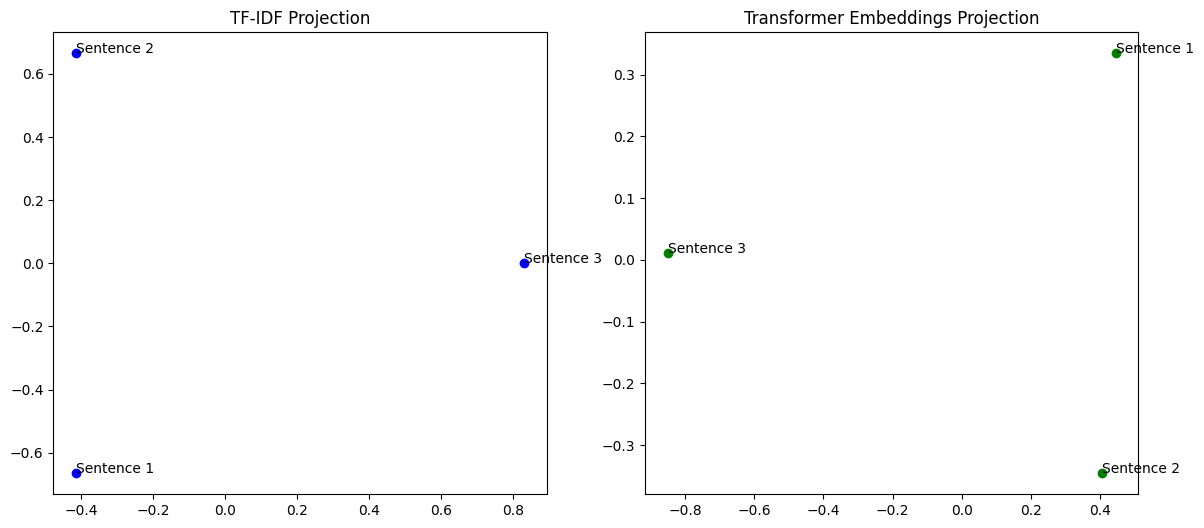

In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer

# 1. Nos phrases
sentences = [
    "I am very tired after playing football",
    "I feel exhausted after a soccer match",
    "I love eating pizza with friends"
]

# 2. TF-IDF Vectorisation
vectorizer = TfidfVectorizer()
tfidf_vectors = vectorizer.fit_transform(sentences).toarray()

# 3. Embeddings avec SentenceTransformer
#model = SentenceTransformer('all-mpnet-base-v2')
embedding_vectors = modeltransformer.encode(sentences)

# 4. Réduction de dimension (PCA) pour passer à 2D
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_vectors)
embeddings_2d = pca.fit_transform(embedding_vectors)

# 5. Tracer les deux méthodes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot TF-IDF
axs[0].scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], color='blue')
for i, txt in enumerate(sentences):
    axs[0].annotate(f"Sentence {i+1}", (tfidf_2d[i, 0], tfidf_2d[i, 1]))
axs[0].set_title('TF-IDF Projection')

# Plot Embeddings
axs[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='green')
for i, txt in enumerate(sentences):
    axs[1].annotate(f"Sentence {i+1}", (embeddings_2d[i, 0], embeddings_2d[i, 1]))
axs[1].set_title('Transformer Embeddings Projection')

plt.show()


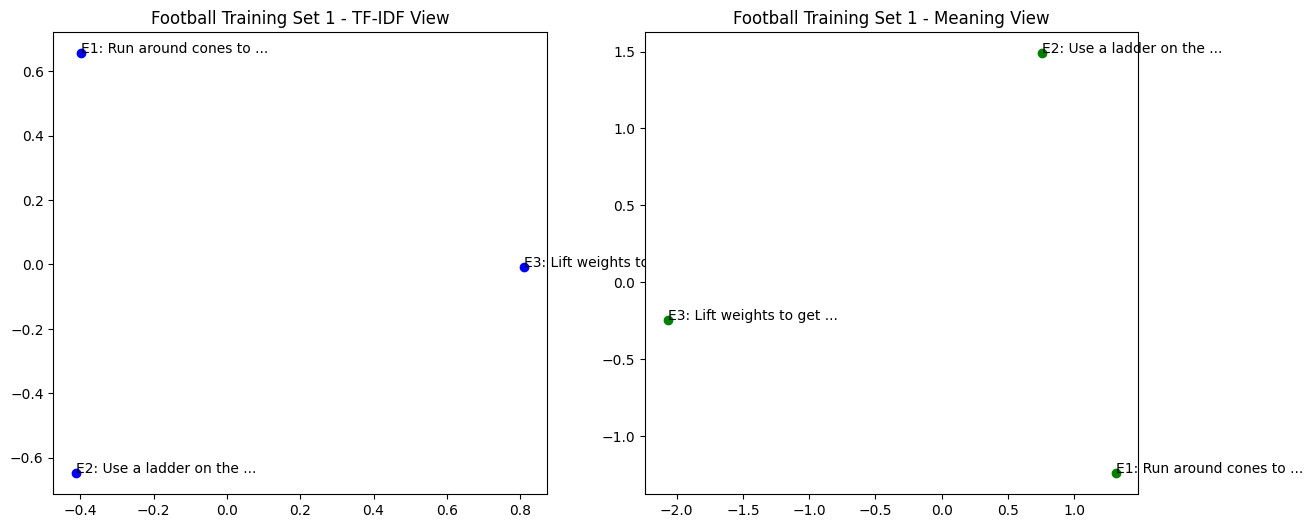

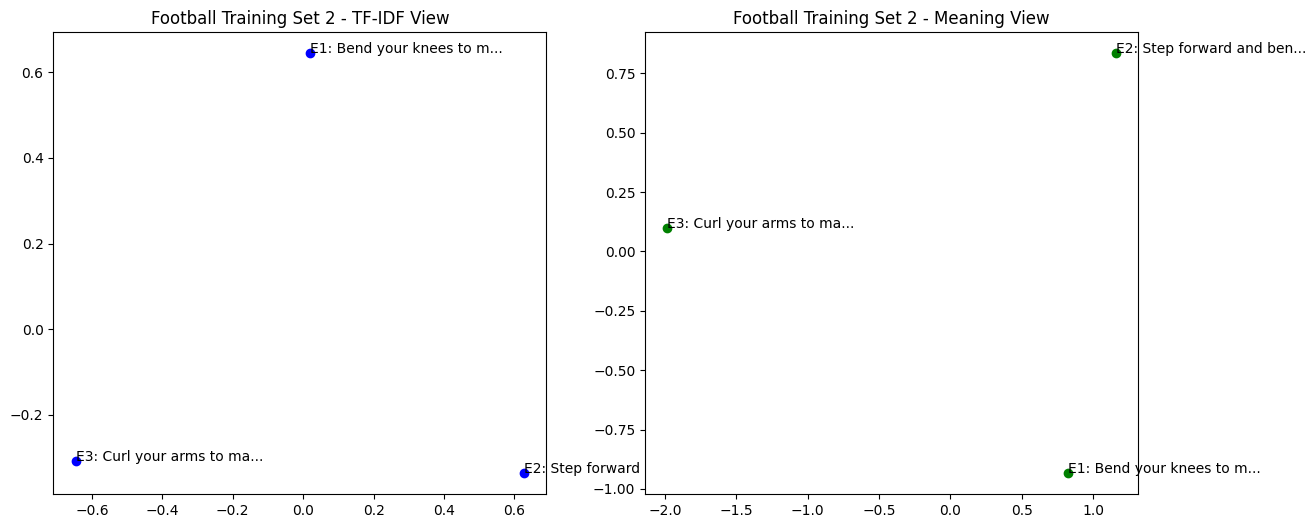

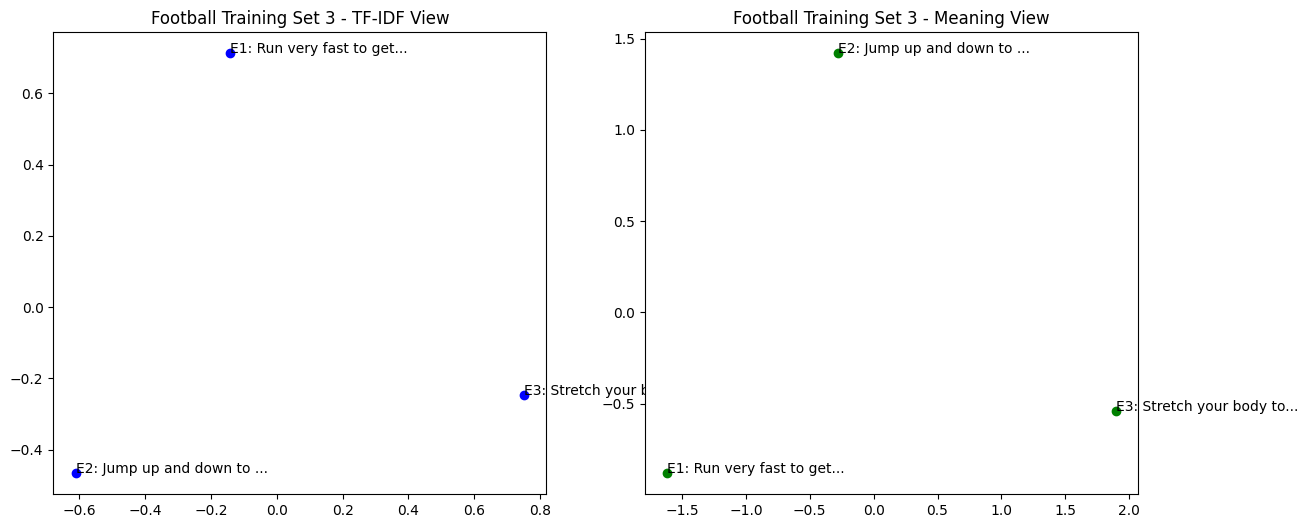

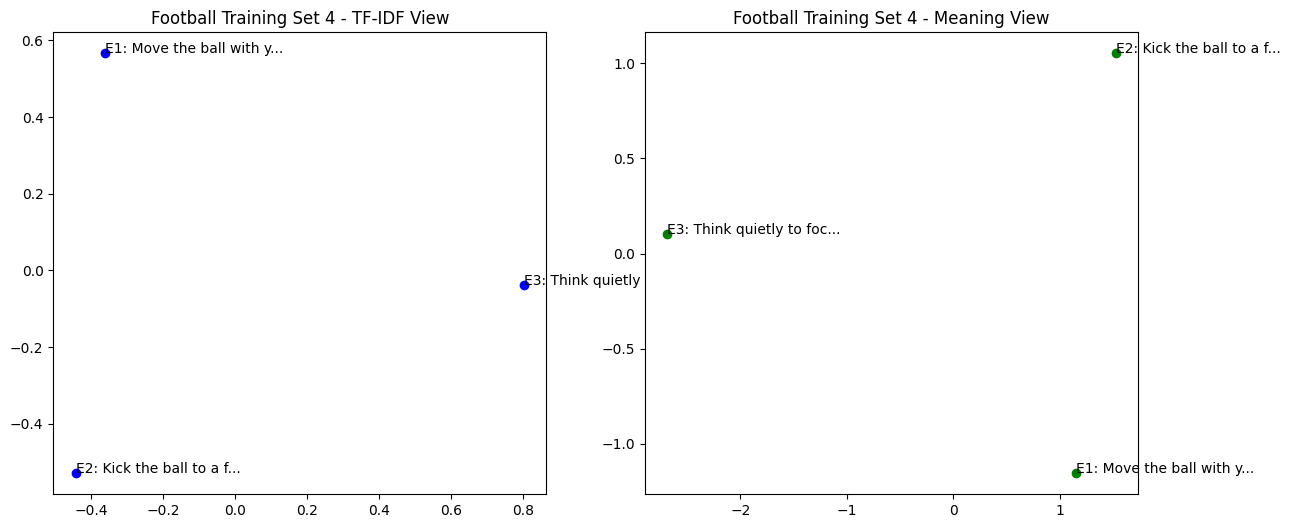

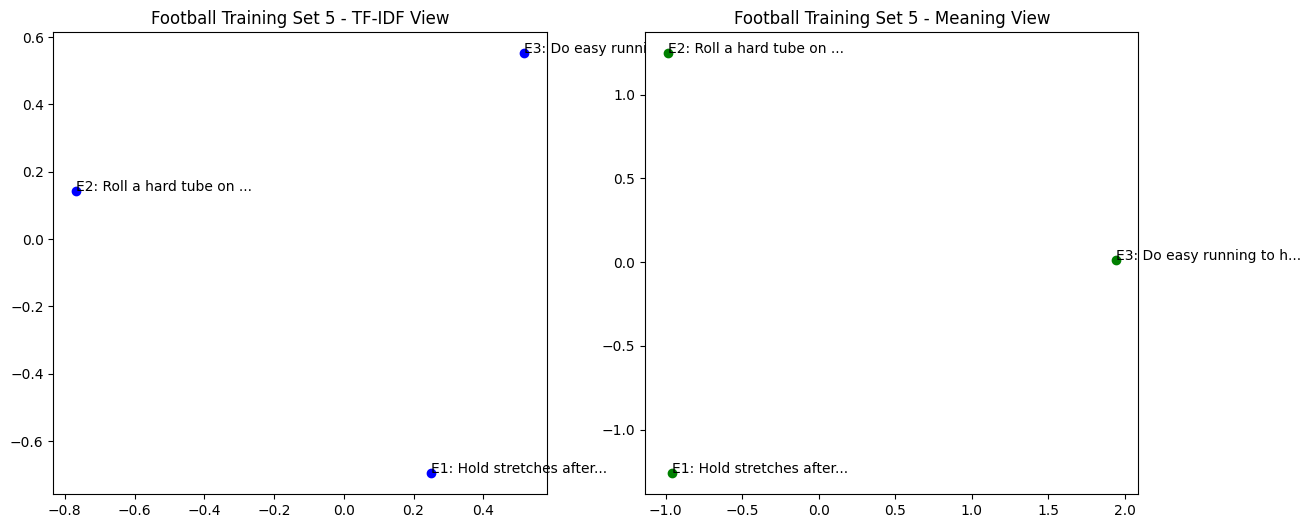

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import numpy as np

# Charger le modèle une seule fois

# Ensemble d'exercices de football avec des mots plus simples
football_exercise_sets_simple = [
    # Ensemble 1: Devenir plus agile
    [
        "Run around cones to be quicker on your feet for football.",
        "Use a ladder on the ground to step fast for better soccer moves.",
        "Lift weights to get stronger arms." # Pas directement lié à l'agilité des pieds
    ],
    # Ensemble 2: Muscles des jambes plus forts
    [
        "Bend your knees to make your leg muscles strong for soccer.",
        "Step forward and bend your knees to help your back and legs for football.",
        "Curl your arms to make your biceps bigger." # Pas directement lié aux jambes
    ],
    # Ensemble 3: Courir plus vite et sauter haut
    [
        "Run very fast to get more speed for football.",
        "Jump up and down to get powerful legs for soccer.",
        "Stretch your body to be more bendy." # Pas directement lié à la vitesse/saut
    ],
    # Ensemble 4: Mieux contrôler le ballon
    [
        "Move the ball with your feet to get better control in football.",
        "Kick the ball to a friend to get better at passing in soccer.",
        "Think quietly to focus your mind." # Pas directement lié au contrôle du ballon
    ],
    # Ensemble 5: Se sentir mieux après le match
    [
        "Hold stretches after playing to help your muscles recover in football.",
        "Roll a hard tube on your legs to make them feel better after soccer.",
        "Do easy running to help your heart." # Pas directement lié à la récupération musculaire ciblée
    ]
]

# Fonction pour visualiser les projections
def plot_projections(tfidf_2d, embeddings_2d, sentences, title_prefix):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Plot TF-IDF
    axs[0].scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], color='blue')
    for i, txt in enumerate(sentences):
        axs[0].annotate(f"E{i+1}: {txt[:20]}...", (tfidf_2d[i, 0], tfidf_2d[i, 1]))
    axs[0].set_title(f'{title_prefix} - TF-IDF View')

    # Plot Embeddings
    axs[1].scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='green')
    for i, txt in enumerate(sentences):
        axs[1].annotate(f"E{i+1}: {txt[:20]}...", (embeddings_2d[i, 0], embeddings_2d[i, 1]))
    axs[1].set_title(f'{title_prefix} - Meaning View')

    plt.show()

# Itérer sur chaque ensemble d'exercices de football (avec mots plus simples)
for i, sentences in enumerate(football_exercise_sets_simple):
    # 2. TF-IDF Vectorisation (Word Counting)
    vectorizer = TfidfVectorizer()
    tfidf_vectors = vectorizer.fit_transform(sentences).toarray()

    # 3. Embeddings avec SentenceTransformer (Meaning Understanding)
    embedding_vectors = modeltransformer.encode(sentences)

    # 4. Réduction de dimension (PCA) pour passer à 2D (Making it easy to see)
    pca_tfidf = PCA(n_components=2)
    tfidf_2d = pca_tfidf.fit_transform(tfidf_vectors)

    pca_embeddings = PCA(n_components=2)
    embeddings_2d = pca_embeddings.fit_transform(embedding_vectors)

    # 5. Tracer les deux méthodes (Showing the pictures)
    plot_projections(tfidf_2d, embeddings_2d, sentences, f"Football Training Set {i+1}")

In [34]:
from nltk.translate.bleu_score import sentence_bleu

# Suppose que tu as une réponse modèle idéale
reference = ["suggest", "some", "stretching", "for", "lower", "back", "pain"]

# La réponse du modèle (Mistral ou LLaMA) que tu veux évaluer
response = response.split()  # on découpe en mots

# Calcul du BLEU score
bleu_score = sentence_bleu([reference], response)

print(f"BLEU Score: {bleu_score:.2f}")


BLEU Score: 0.00



--- Analyse de l'ensemble d'exercices Football 1 ---


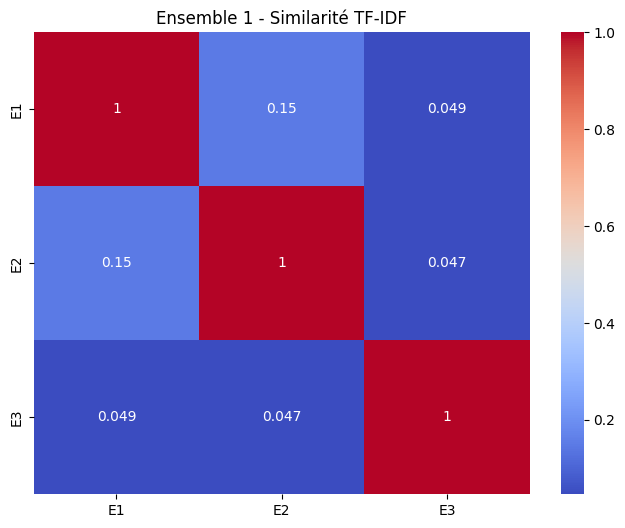

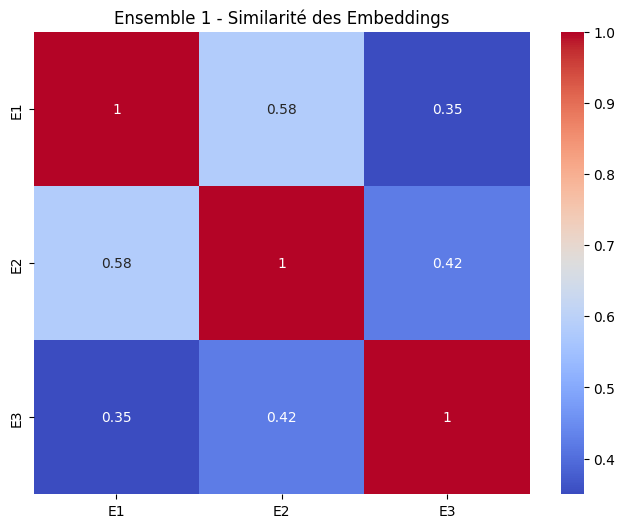


--- Analyse de l'ensemble d'exercices Football 2 ---


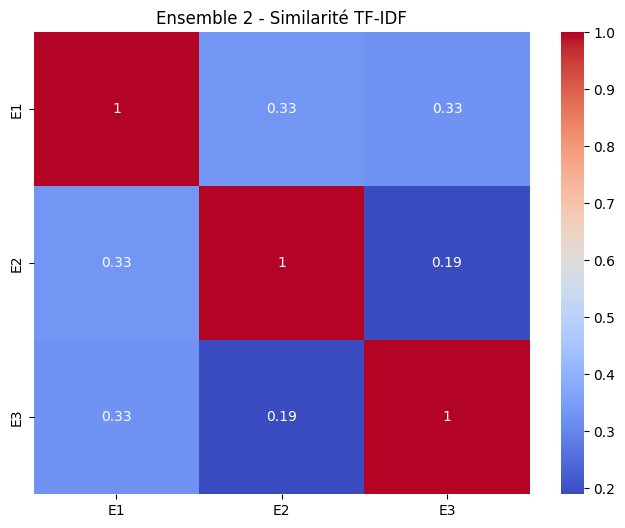

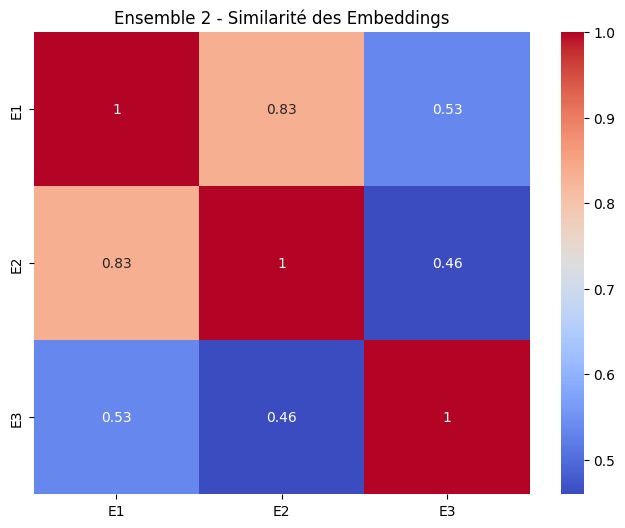


--- Analyse de l'ensemble d'exercices Football 3 ---


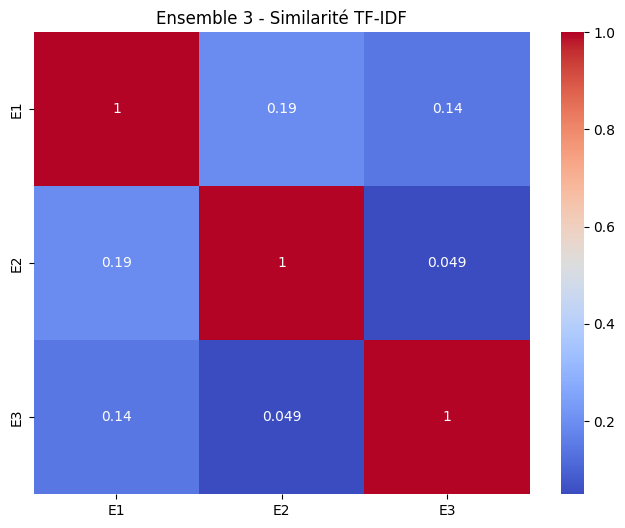

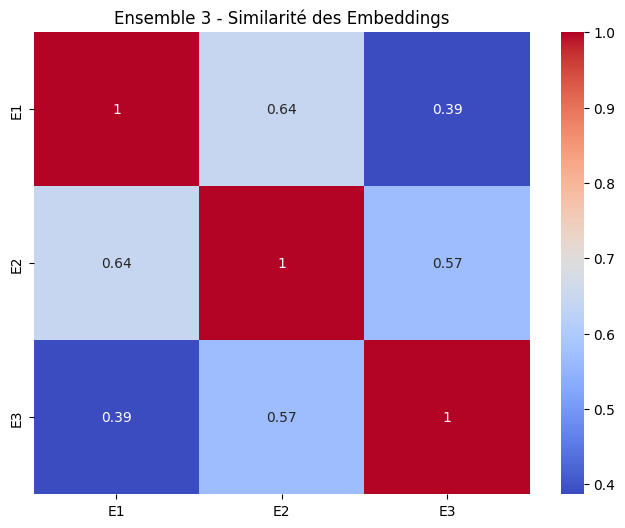


--- Analyse de l'ensemble d'exercices Football 4 ---


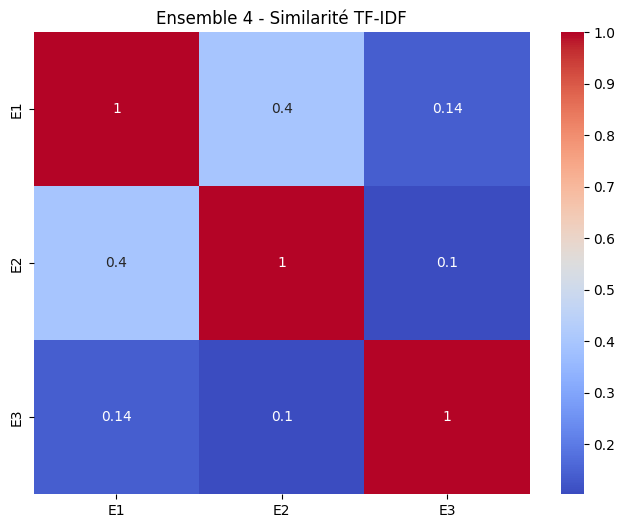

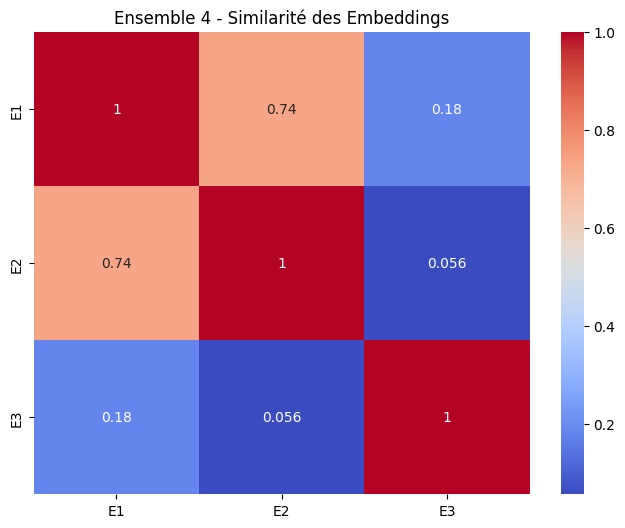


--- Analyse de l'ensemble d'exercices Football 5 ---


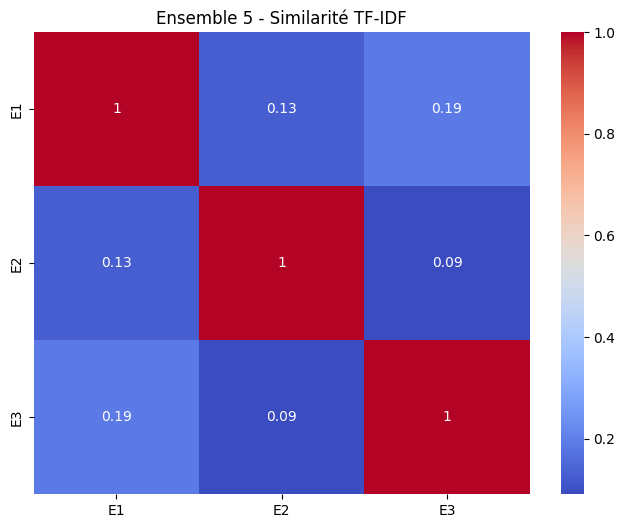

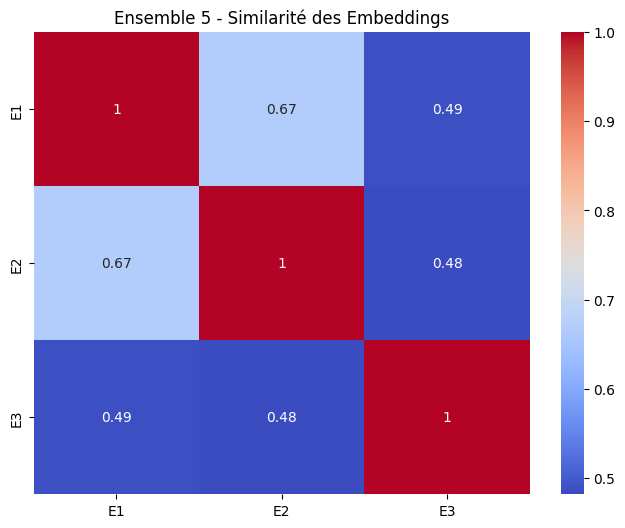

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import numpy as np
import seaborn as sns
import pandas as pd

# Charger le modèle une seule fois

# Ensemble d'exercices de football avec des mots plus simples
football_exercise_sets_simple = [
    # Ensemble 1: Devenir plus agile
    [
        "Run around cones to be quicker on your feet for football.",
        "Use a ladder on the ground to step fast for better soccer moves.",
        "Lift weights to get stronger arms." # Pas directement lié à l'agilité des pieds
    ],
    # Ensemble 2: Muscles des jambes plus forts
    [
        "Bend your knees to make your leg muscles strong for soccer.",
        "Step forward and bend your knees to help your back and legs for football.",
        "Curl your arms to make your biceps bigger." # Pas directement lié aux jambes
    ],
    # Ensemble 3: Courir plus vite et sauter haut
    [
        "Run very fast to get more speed for football.",
        "Jump up and down to get powerful legs for soccer.",
        "Stretch your body to be more bendy." # Pas directement lié à la vitesse/saut
    ],
    # Ensemble 4: Mieux contrôler le ballon
    [
        "Move the ball with your feet to get better control in football.",
        "Kick the ball to a friend to get better at passing in soccer.",
        "Think quietly to focus your mind." # Pas directement lié au contrôle du ballon
    ],
    # Ensemble 5: Se sentir mieux après le match
    [
        "Hold stretches after playing to help your muscles recover in football.",
        "Roll a hard tube on your legs to make them feel better after soccer.",
        "Do easy running to help your heart." # Pas directement lié à la récupération musculaire ciblée
    ]
]

def visualize_similarity_heatmap(similarity_matrix, labels, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.show()

# Itérer sur chaque ensemble d'exercices de football (avec mots plus simples)
for i, sentences in enumerate(football_exercise_sets_simple):
    print(f"\n--- Analyse de l'ensemble d'exercices Football {i+1} ---")

    # 1. TF-IDF Vectorisation (Word Counting)
    vectorizer = TfidfVectorizer()
    tfidf_vectors = vectorizer.fit_transform(sentences).toarray()

    # Calculer la similarité cosinus entre les vecteurs TF-IDF
    tfidf_similarity = cosine_similarity(tfidf_vectors)
    visualize_similarity_heatmap(tfidf_similarity, [f"E{j+1}" for j in range(len(sentences))], f"Ensemble {i+1} - Similarité TF-IDF")

    # 2. Embeddings avec SentenceTransformer (Meaning Understanding)
    embedding_vectors = modeltransformer.encode(sentences)

    # Calculer la similarité cosinus entre les embeddings
    embedding_similarity = cosine_similarity(embedding_vectors)
    visualize_similarity_heatmap(embedding_similarity, [f"E{j+1}" for j in range(len(sentences))], f"Ensemble {i+1} - Similarité des Embeddings")

In [35]:
import time
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from rouge import Rouge

# Suppose que tu as 2 fonctions pour appeler tes modèles : `call_llama()` et `call_mistral()`
# Ces fonctions prennent en entrée user_query et context, et retournent une réponse texte

# Setup
rouge = Rouge()

def evaluate_models(user_queries, contexts):
    results = []

    for i, (query, context) in enumerate(zip(user_queries, contexts)):
        print(f"\n🔵 Question {i+1}: {query}")

        # --- Mistral ---
        start = time.time()
        mistral_response = test_mistral_nemo_api(query, context)
        mistral_time = time.time() - start

        # --- LLaMA ---
        start = time.time()
        llama_response = ask_llm_via_rapidapi(query, context)  # Il faut avoir une fonction similaire pour LLaMA
        llama_time = time.time() - start

        # --- Metrics Calculation ---
        # Pour la simplicité, ici je prends la question comme "référence", mais tu peux préparer une vraie réponse attendue si tu veux
# Nouvelle liste de réponses de référence :
        reference_answers = [
    "You can try gentle back stretches like child's pose, cat-cow stretch, and seated spinal twist to relieve back pain.",
    "Effective shoulder stretches include cross-body arm stretch, overhead tricep stretch, and doorway chest stretch.",
    "Neck pain can be relieved with gentle stretches such as neck tilts, chin tucks, and side-to-side neck rotations."
        ]

# Ensuite dans evaluate_models, au lieu de :
# reference = query

# Tu fais ça :
        reference = reference_answers[i]

        # ROUGE
        rouge_mistral = rouge.get_scores(mistral_response, reference, avg=True)['rouge-l']['f']
        rouge_llama = rouge.get_scores(llama_response, reference, avg=True)['rouge-l']['f']

        # Semantic Similarity
        mistral_embed = modeltransformer.encode([mistral_response])
        llama_embed = modeltransformer.encode([llama_response])
        ref_embed = modeltransformer.encode([reference])

        mistral_sim = cosine_similarity(mistral_embed, ref_embed)[0][0]
        llama_sim = cosine_similarity(llama_embed, ref_embed)[0][0]

        # Stocker résultats
        results.append({
            'Question': query,
            'Mistral Response': mistral_response,
            'LLaMA Response': llama_response,
            'Mistral Time (s)': round(mistral_time, 2),
            'LLaMA Time (s)': round(llama_time, 2),
            'Mistral ROUGE-L': round(rouge_mistral, 4),
            'LLaMA ROUGE-L': round(rouge_llama, 4),
            'Mistral Semantic Sim': round(mistral_sim, 4),
            'LLaMA Semantic Sim': round(llama_sim, 4),
        })

    return pd.DataFrame(results)

# Exemples de questions + contextes
user_queries = [
    "I have pain in my back, suggest stretching exercises",
    "How to stretch my shoulders effectively?",
    "Which stretches are good for neck pain?"
]

contexts = [
    "your context for back pain here",
    "your context for shoulders here",
    "your context for neck here"
]

# ⚡ Lancer l'évaluation
results_df = evaluate_models(user_queries, contexts)

# 🔥 Résultats
pd.set_option('display.max_colwidth', None)  # Pour voir les textes en entier
print(results_df)



🔵 Question 1: I have pain in my back, suggest stretching exercises

🔵 Question 2: How to stretch my shoulders effectively?

🔵 Question 3: Which stretches are good for neck pain?
                                               Question  \
0  I have pain in my back, suggest stretching exercises   
1              How to stretch my shoulders effectively?   
2               Which stretches are good for neck pain?   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [30]:
pip install rouge


<ipython-input-36-41fb06073a5a>:35: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-36-41fb06073a5a>:35: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


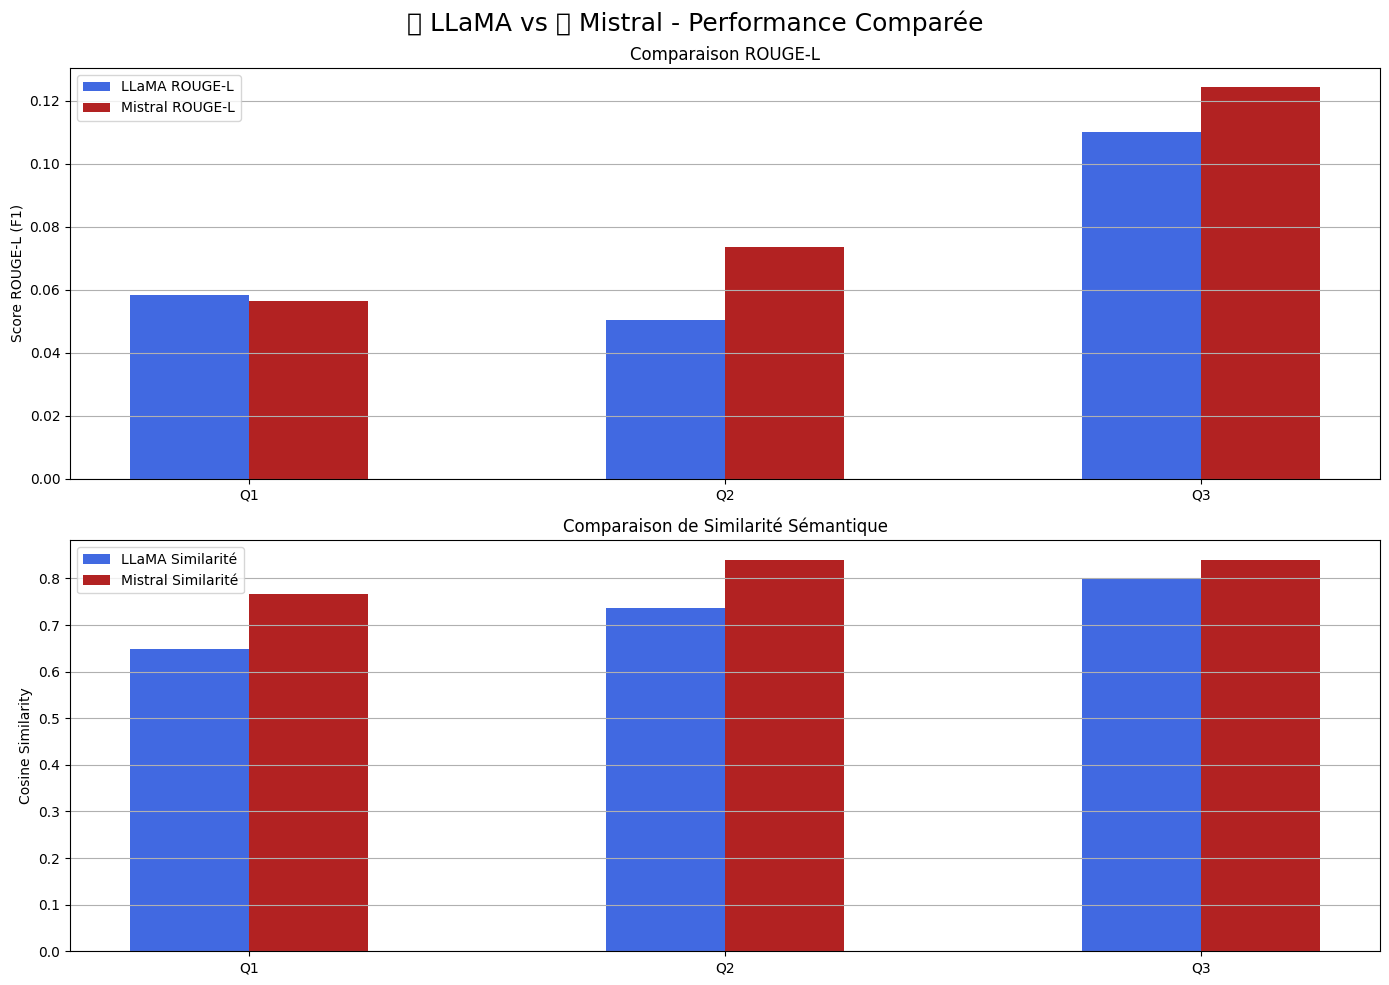

In [36]:
import matplotlib.pyplot as plt
import numpy as np

def plot_comparison(results_df):
    labels = [f"Q{i+1}" for i in range(len(results_df))]  # Labels type Q1, Q2, Q3

    x = np.arange(len(labels))  # position des groupes
    width = 0.25  # largeur des barres

    fig, axs = plt.subplots(2, 1, figsize=(14, 10))
    fig.suptitle('🔵 LLaMA vs 🔴 Mistral - Performance Comparée', fontsize=18)

    # --- Subplot 1 : ROUGE-L ---
    axs[0].bar(x - width/2, results_df['LLaMA ROUGE-L'], width, label='LLaMA ROUGE-L', color='royalblue')
    axs[0].bar(x + width/2, results_df['Mistral ROUGE-L'], width, label='Mistral ROUGE-L', color='firebrick')

    axs[0].set_ylabel('Score ROUGE-L (F1)')
    axs[0].set_title('Comparaison ROUGE-L')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].legend()
    axs[0].grid(axis='y')

    # --- Subplot 2 : Similarité Sémantique ---
    axs[1].bar(x - width/2, results_df['LLaMA Semantic Sim'], width, label='LLaMA Similarité', color='royalblue')
    axs[1].bar(x + width/2, results_df['Mistral Semantic Sim'], width, label='Mistral Similarité', color='firebrick')

    axs[1].set_ylabel('Cosine Similarity')
    axs[1].set_title('Comparaison de Similarité Sémantique')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].legend()
    axs[1].grid(axis='y')

    plt.tight_layout()
    plt.show()

# --- Appel de la fonction ---
plot_comparison(results_df)


<ipython-input-37-823129bb1785>:20: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


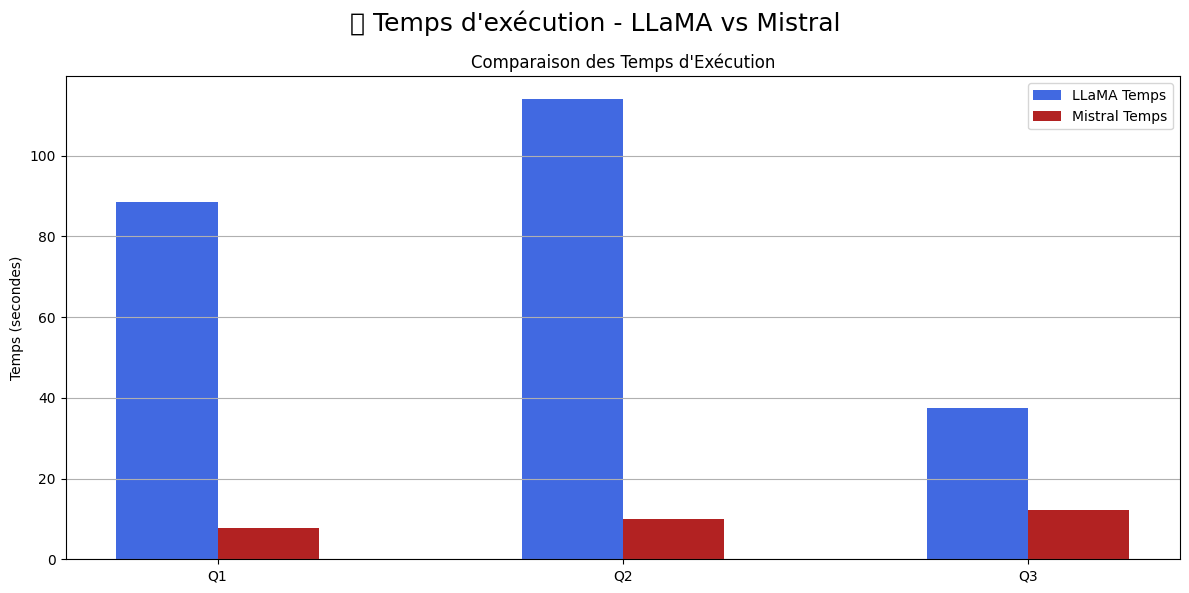

In [37]:
def plot_execution_time(results_df):
    labels = [f"Q{i+1}" for i in range(len(results_df))]  # Labels Q1, Q2, etc.

    x = np.arange(len(labels))
    width = 0.25  # largeur des barres

    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle('⏱️ Temps d\'exécution - LLaMA vs Mistral', fontsize=18)

    ax.bar(x - width/2, results_df['LLaMA Time (s)'], width, label='LLaMA Temps', color='royalblue')
    ax.bar(x + width/2, results_df['Mistral Time (s)'], width, label='Mistral Temps', color='firebrick')

    ax.set_ylabel('Temps (secondes)')
    ax.set_title('Comparaison des Temps d\'Exécution')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    ax.grid(axis='y')

    plt.tight_layout()
    plt.show()

# --- Appel de la fonction ---
plot_execution_time(results_df)


In [38]:
def summarize_results(results_df):
    summary = {}

    # Moyennes
    summary['Avg Mistral Time (s)'] = round(results_df['Mistral Time (s)'].mean(), 2)
    summary['Avg LLaMA Time (s)'] = round(results_df['LLaMA Time (s)'].mean(), 2)
    summary['Avg Mistral ROUGE-L'] = round(results_df['Mistral ROUGE-L'].mean(), 4)
    summary['Avg LLaMA ROUGE-L'] = round(results_df['LLaMA ROUGE-L'].mean(), 4)
    summary['Avg Mistral Semantic Sim'] = round(results_df['Mistral Semantic Sim'].mean(), 4)
    summary['Avg LLaMA Semantic Sim'] = round(results_df['LLaMA Semantic Sim'].mean(), 4)

    # Meilleur modèle par catégorie
    summary['Faster Model'] = 'Mistral' if summary['Avg Mistral Time (s)'] < summary['Avg LLaMA Time (s)'] else 'LLaMA'
    summary['Higher ROUGE-L'] = 'Mistral' if summary['Avg Mistral ROUGE-L'] > summary['Avg LLaMA ROUGE-L'] else 'LLaMA'
    summary['Higher Semantic Sim'] = 'Mistral' if summary['Avg Mistral Semantic Sim'] > summary['Avg LLaMA Semantic Sim'] else 'LLaMA'

    return pd.DataFrame([summary])

# --- Appel de la fonction ---
summary_df = summarize_results(results_df)
print("\n✅ Résumé des performances :")
print(summary_df.to_string(index=False))



✅ Résumé des performances :
 Avg Mistral Time (s)  Avg LLaMA Time (s)  Avg Mistral ROUGE-L  Avg LLaMA ROUGE-L  Avg Mistral Semantic Sim  Avg LLaMA Semantic Sim Faster Model Higher ROUGE-L Higher Semantic Sim
                 9.95               79.96               0.0849              0.073                    0.8156                  0.7274      Mistral        Mistral             Mistral


In [1]:
import os
repo_name = "tactic_sense"
if os.path.exists(repo_name):
    os.chdir(repo_name)
    !git checkout ahmed
else:
    !git clone https://github.com/mohamedxxhechxxbenxxhadid/tactic_sense.git
    os.chdir(repo_name)
    !git checkout ahmed

Cloning into 'tactic_sense'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 260 (delta 36), reused 243 (delta 26), pack-reused 0 (from 0)
Receiving objects: 100% (260/260), 6.07 MiB | 31.89 MiB/s, done.
Resolving deltas: 100% (36/36), done.
Branch 'ahmed' set up to track remote branch 'ahmed' from 'origin'.
Switched to a new branch 'ahmed'


In [2]:
cp /content/modeling_phase.ipynb.  # Replace 'your_notebook_name.ipynb' with the actual name

cp: missing destination file operand after '/content/modeling_phase.ipynb.'
Try 'cp --help' for more information.


In [3]:
!git add modeling_phase.ipynb your_dataset_name.csv  # Replace with your actual file names

fatal: pathspec 'modeling_phase.ipynb' did not match any files


In [7]:
!cp /content/Untitled2.ipynb .

cp: cannot stat '/content/Untitled2.ipynb': No such file or directory
